In [108]:
# import numpy as np
# temp = 10.0*np.random.rand()-5.0
# temp,np.sqrt(4.0-temp ** 2)

### 数据生成

In [109]:
x1_pos = []
x2_pos = []
y_pos = []
for i in range(1000):
    temp = 4.0*np.random.rand()-2.0
    y_pos.append(1)
    x1_pos.append(temp)
    if i%2==0:
        x2_pos.append(np.sqrt(4.0-temp ** 2)+0.3*np.random.randn())
    elif i%2==1:
        x2_pos.append(-np.sqrt(4.0-temp ** 2)+0.3*np.random.randn())
        
x1_Neg = []
x2_Neg = []
y_Neg = []
for i in range(1000):
    temp = 10.0*np.random.rand()-5.0
    y_Neg.append(1)
    x1_Neg.append(temp)
    if i%2==0:
        x2_Neg.append(np.sqrt(25.0-temp ** 2)+0.3*np.random.randn())
    elif i%2==1:
        x2_Neg.append(-np.sqrt(25.0-temp ** 2)+0.3*np.random.randn())

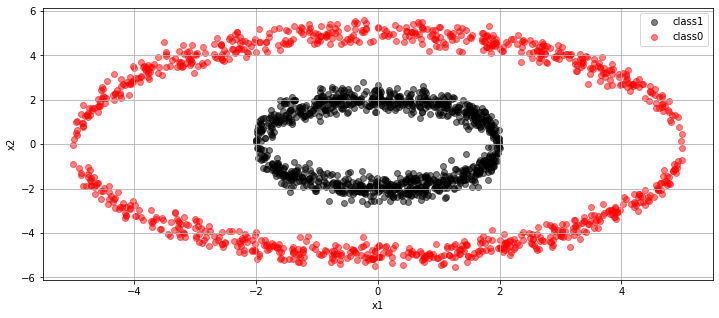

In [110]:
plt.figure(figsize=(12,5))
plt.scatter(x1_pos,x2_pos,color='black',label="class1",alpha=0.5)
plt.scatter(x1_Neg,x2_Neg,color='red',label="class0",alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

In [102]:
Dict = {'x1':x1_pos+x1_Neg,'x2':x2_pos+x2_Neg,'y':y_pos+y_Neg}
DataTrain = pd.DataFrame(Dict)

In [104]:
x1_pos = []
x2_pos = []
y_pos = []
for i in range(250):
    temp = 4.0*np.random.rand()-2.0
    y_pos.append(1)
    x1_pos.append(temp)
    if i%2==0:
        x2_pos.append(np.sqrt(4.0-temp ** 2)+0.3*np.random.randn())
    elif i%2==1:
        x2_pos.append(-np.sqrt(4.0-temp ** 2)+0.3*np.random.randn())
        
x1_Neg = []
x2_Neg = []
y_Neg = []
for i in range(250):
    temp = 10.0*np.random.rand()-5.0
    y_Neg.append(1)
    x1_Neg.append(temp)
    if i%2==0:
        x2_Neg.append(np.sqrt(25.0-temp ** 2)+0.3*np.random.randn())
    elif i%2==1:
        x2_Neg.append(-np.sqrt(25.0-temp ** 2)+0.3*np.random.randn())

In [105]:
Dict = {'x1':x1_pos+x1_Neg,'x2':x2_pos+x2_Neg,'y':y_pos+y_Neg}
DataTest = pd.DataFrame(Dict)

### model training

$$\vec{x}\in\mathbb{R}^{1\times 2}$$

$$W_1\in\mathbb{R}^{2\times 10}; b_1\in\mathbb{R}^{1\times 10}$$

$$W_2\in\mathbb{R}^{10\times 2}; b_2\in\mathbb{R}^{1\times 2}$$

$$z_1 = \sigma(\vec{x}W_1+b_1)$$

$$z_2 = \sigma({z_1}W_2+b_2)$$

$$\hat{y} = {\rm{softmax}}(z_2)$$
***********
$$Loss(W_1,W_2,b_1,b_2) = -\frac{1}{N}\sum_{i=1}^{N}[y_i\log\hat{y_i}+(1-y_i)\log(1-\hat{y_i})]$$

***********
$$k=0,1,2,...$$

$$W_1^{k+1}=W_1^{k}-\alpha_k\frac{\partial Loss(W_1^{k},W_2^{k},b_1^{k},b_2^{k})}{\partial W_1}$$

$$W_2^{k+1}=W_2^{k}-\alpha_k\frac{\partial Loss(W_1^{k},W_2^{k},b_1^{k},b_2^{k})}{\partial W_2}$$

$$b_1^{k+1}=b_1^{k}-\alpha_k\frac{\partial Loss(W_1^{k},W_2^{k},b_1^{k},b_2^{k})}{\partial b_1}$$

$$b_2^{k+1}=b_2^{k}-\alpha_k\frac{\partial Loss(W_1^{k},W_2^{k},b_1^{k},b_2^{k})}{\partial b_2}$$

In [ ]:
class DeepNeuralNetworkModel(n.Module):
    # 构造类
    def __init__(self,input_dim1,output_dim1,input_dim2,output_dim2):  # output_dim1,input_dim2
        super(DeepNeuralNetworkModel,self).__init__()
        # Fully connected layer1
        self.FC_layer1 = nn.Linear(input_dim1,output_dim1)
        
        # Fully connected layer2
        self.FC_layer2 = nn.Linear(input_dim2,output_dim2)
        
        # activation function sigmoid()
        self.act_sig = nn.Sigmoid()
        
    # 前向传播函数
    def forward(self,x):
        z1_ = self.FC_layer1(x)
        z1 =  self.act_sig(z1_)
        
        z2_ = self.FC_layer1(z1)
        z2 =  self.act_sig(z2_)
        
        return z2